# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf # welcome!!
import scipy.stats
from matplotlib import pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [3]:
student_data.head(5)

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

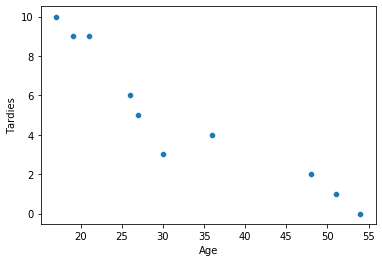

In [4]:
# Your code here.
sns.scatterplot(x = student_data.Age, y = student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
#Hypothesis:
#Based on this dataset we can see that there exists a negative correlation between
#The age of a pupil and their tardies. Meaning that the younger the more
#tardies a pupil will have

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
corr = scipy.stats.pearsonr(student_data.Tardies, student_data.Age)[0]

covariance = np.cov(student_data.Tardies,student_data.Age)[0][1]

print(covariance, corr)

-45.56666666666666 -0.939162688688712


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X=student_data.Age.to_frame(),
           y=student_data.Tardies)

#Outcome variable = Grade
#Method used = simple linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot your regression model on your scatter plot.

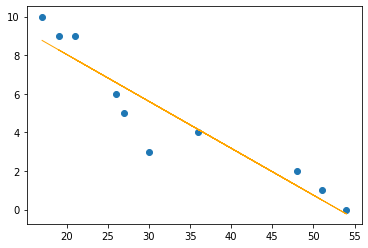

In [9]:
# Your code here.
X = student_data.Age
model_grad = lr.coef_[0]
model_intercept = lr.intercept_
model_eq = model_grad * X + model_intercept  

plt.scatter(X, student_data.Tardies)
plt.plot(X, model_eq, lw=1, color = "orange")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 
#As we can see there s a strong relationship between the youth of
#studnets and the amoun of days are late. So yes, we can say that age is a 
#good predictor for tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [33]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [34]:
#only keep useful columns
model_df = vehicles.filter(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile'])

In [35]:
# Your response here.
model_df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [36]:
#Variable with highest correlation
#The variable with highest correlation is fuel barrels per year. 
#However combined mpg and fuel cost/year are also very important
#The least helpul variable to determine co2 emissions is Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [38]:
# Your response here.

lr = LinearRegression()
lr.fit(X = model_df.drop(model_df.columns[-1],axis=1,inplace=False), y=model_df["CO2 Emission Grams/Mile"])

#Model used = Multiple linear regression with all columns except co2 emissions as X and co2 emissions as Y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [45]:
# Your response here.
model_df.columns = ['yr', 'cyl', 'barr', 'mpg', 'fuelcost', 'co2']

results = smf.ols('co2 ~ yr + cyl + barr + mpg + fuelcost' , data=model_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:04:54   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.000     731.880     807.897
yr            -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cyl            1.8788      0.083     22.598      0.000       1.716       2.042
barr          19.0529      0.061    311.600      0.000      18.933      19.173
mpg           -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuelcost       0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
print(lr.coef_)
print(lr.intercept_)
#As we can see our coefficients and intercept match the one in the summary
#so our resulting model is very accurate
#The most important variables are Fuel barrels per year by a lot compared to othervariables

[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
769.8882836465802


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [73]:
# Your code here. 
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

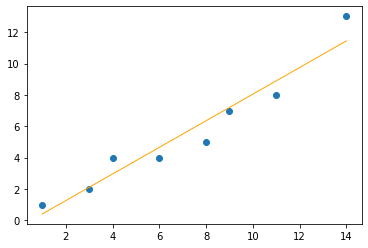

In [74]:
# Your code here.
lr = LinearRegression()
lr.fit(X = data.X.to_frame(), y = data.Y)

X = data.X
Y = data.Y
model_grad = lr.coef_[0]
model_intercept = lr.intercept_

model_eq = model_grad * X + model_intercept 

plt.scatter(X, Y)
plt.plot(X, model_eq, lw=1, color = "orange")
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [75]:
# Your response here. 
#This tells us that there is a ñikely relationship and that using
#a linear regression model would be a good idea

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [76]:
# Your response here. 
#The point at (14,13) is the biggest outlier so we will
#remove it and repeat the previous process

new_data = data.drop([7])

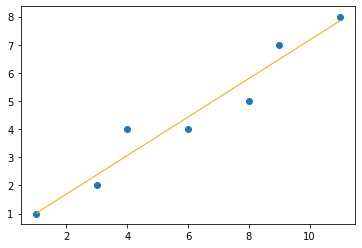

In [77]:
#repeat model creation
lr = LinearRegression()
lr.fit(X = new_data.X.to_frame(), y = new_data.Y)

X = new_data.X
Y = new_data.Y
model_grad = lr.coef_[0]
model_intercept = lr.intercept_

model_eq = model_grad * X + model_intercept 

plt.scatter(X, Y)
plt.plot(X, model_eq, lw=1, color = "orange")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [82]:
# Your response here. 

results_before = smf.ols('X ~ Y', data=data).fit()
results_before.summary()


/Users/juanmarin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000102
Time:                        17:25:38   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Y              1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
result_after = smf.ols('X ~ Y', data=new_data).fit()